# NFT 이미지 유사도 검증 API 테스트

## 함수 정의

In [92]:
import os
import random
import requests
import base64
from PIL import Image
from io import BytesIO

def encode_image_to_base64(img_filepath):
    with open(img_filepath, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    
def test_check_and_register(img_filepath):
    img_base64 = encode_image_to_base64(img_filepath)
    data = {"img_file": img_base64}
    response = requests.post("http://localhost:8000/check_and_register/", json=data)
    print(response.json())
    return response.json()
    
def test_reset():
    response = requests.post("http://localhost:8000/reset/")
    print(response.json())

## 테스트 파일 로드

In [93]:
azuki_plagiarism_path = "nft_images/azuki_plagiarism"
bayc_plagiarism_path = "nft_images/bayc_plagiarism"
cryptopunks_plagiarism_path = "nft_images/cryptopunks_plagiarism"

azuki_plagiarism_test_file_list = [f for f in os.listdir(azuki_plagiarism_path) if f.endswith('.png')]
bayc_plagiarism_test_file_list = [f for f in os.listdir(bayc_plagiarism_path) if f.endswith('.png')]
cryptopunks_plagiarism_test_file_list = [f for f in os.listdir(cryptopunks_plagiarism_path) if f.endswith('.png')]

## Azuki 시험 이미지 테스트

### 시험 이미지 샘플 확인

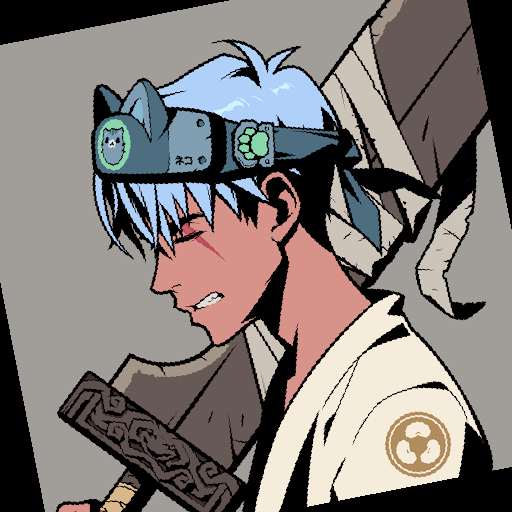

In [103]:
azuki_plagiarism_sample_path = os.path.join(azuki_plagiarism_path, random.choice(azuki_plagiarism_test_file_list))
azuki_plagiarism_sample_image = Image.open(azuki_plagiarism_sample_path).resize((512, 512))
azuki_plagiarism_sample_image.show()

### API 테스트 및 결과 확인 (표절 여부 등)

In [104]:
azuki_result = test_check_and_register(azuki_plagiarism_sample_path)

{'plagiarism': True, 'orig_img_cid': 'QmRDVq8iNJE46yvsfoLZKcf5i7qH2L8UZYtpXLskV4bvni', 'orig_img_file': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAEAAElEQVR4nOydd3gUVReHz713Znt67z2QkNB77x2kq6ACiv2zi4rYK6IoNhRFURAURUBQpEmH0NIILQnpvfdsdnfm3u+P2SybygYCAd1XH56ZO2VnN7vn3HLO76Afv18NVqxYsWLlhsFxXHJi4hvvLjdvjAz0/d8jC2xsNJSytt6Q5/nYuPMlJeUY4+t6sOu52IoVK1astA4hJD42dvknX5g3jujbfcE9c3iep5S26W4IIQToxMnYysoajiPX+WxWB2DFihUrNwaECEKnT578dNW35s2zJoyaPnkc4QilFCHEmKUjAIQQA3bqVHxNrfb6rT9YHYAVK1as3AgQQgiho4ePfP39OvN2OYCLk8OFxGSlQmFro1Eo5EqlguM4aTKHNcT8QoyxKIpRJ+MMegMh7WD9weoArFixYqXdkaz/3l271v3ye6NDOoCvftrcqLFbSICvt5ebm4uTo72DvZ1SqVAplAqFTCaXA4AoigCg1xuiTsRSSq9z3t8cqwOwYsWKlfYEIQSMbduy9fcdf5u32yMob2GyJz45LT45rWl7qJd7eOeQIYP6Ojo6HjsejTFuR+sPVgdgxYoVK+0IQohS8beff/1r3wHz9sfvmz2gX++6Op1Wq62srK6p1VbX1GrrtAa9wSAIhBCRinKZHGMsk/E8zxOC1SqlUqFwdHRglErWHyHUvk9rdQBWrFix0j5gjA0G/fq16w4cP2ne/tyD9/Tt01MQBKVSoVIpnJ0cEUbGiB4ABCANDEwb0uw/Y4xgXFpecfrMOY7j2tv4A1gdgBUrVqy0CxjjujrtN19+fTrhgnn70icWRUaEGQwGaVey7WBB8CdHSGFx6al

### 표절으로 의심되는 이미지 확인

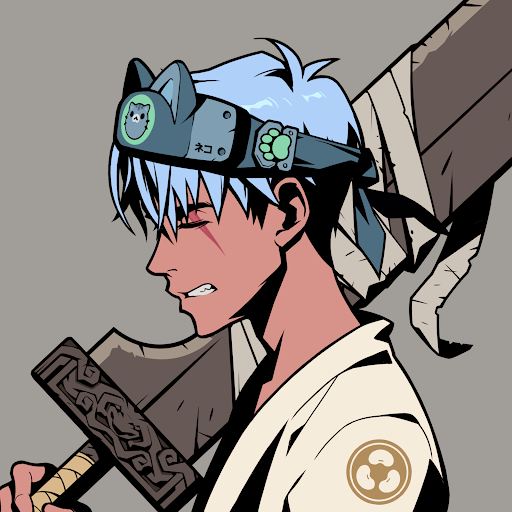

In [105]:
orig_img_data = base64.b64decode(azuki_result["orig_img_file"])
orig_img = Image.open(BytesIO(orig_img_data)).resize((512, 512))
orig_img.show()

## BAYC 시험 이미지 테스트

### 시험 이미지 샘플 확인

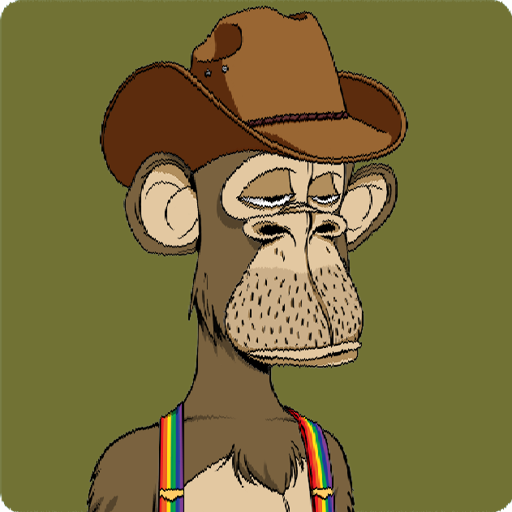

In [83]:
bayc_plagiarism_sample_path = os.path.join(bayc_plagiarism_path, random.choice(bayc_plagiarism_test_file_list))
bayc_plagiarism_sample_image = Image.open(bayc_plagiarism_sample_path).resize((512, 512))
bayc_plagiarism_sample_image.show()

### API 테스트 및 결과 확인 (표절 여부 등)

In [84]:
bayc_result = test_check_and_register(bayc_plagiarism_sample_path)

{'plagiarism': True, 'orig_img_cid': 'QmdU7T6NMTxrGBxHWFK7MXWSuh6jXwM7ZedbL8z7Uoqysw', 'orig_img_file': 'iVBORw0KGgoAAAANSUhEUgAAAncAAAJ3CAYAAAD2yndiAAAACXBIWXMAAAsTAAALEwEAmpwYAAAgAElEQVR4nOzdd3Cc6X0n+O+bOyc00MhAI5JgTsMZ5kmcJI3GK8tenWytbXmts+VQtvZsl++qdCrba1v2rWrltW+1ln0u2YojaYI0ieLMMA5nmDMSkVN3A53T22+8PxoEySGYATRA/D5VKBa73/ft5wWJxref8HsYAAwe0FcP/HNlmeJ9IjZ4IsCK1qcK8ZEyNTPl0+W029ALlge9PiGEEELIw4LlJJmzOJOCwx+TvHVRQ8nvLws+Ep4SYu99Zc8XQg96fQb3Ge6+cuCfKsqy9ieTE5d25sI9j8uxoVaYBvugDSKEEEIIWXYY1rD4Gnptgfb33FUdR6L27Ltf3fOfI/d1KdxjuPvKgX+qcE3pz6QjXb+RvHJk9/28KCGEEEIIuTV3y46DzooV/5Lyc+/ca8i7p3D3jwfe/o3Jzn2fS/QeevyeW0kIIYQQQu6Jp3XX++Ur937nd/Y8+y93e85dhbuvHPinCtuk8keTp1/+ol7IuB+olYQQQggh5K5xkiNZvvEz/zNXLn79bnrx7hjuvnHi9CdTF175UvTiW3vnrJWEEEIIIeSelK1+fp9rzUv/8PtbNv70dsfdNtz9/dHDeydP/vt/TQ+d2jjnLSSEEEIIIffE2bD5dPnmz/3Z723fue9Wx9wy3P390cN7wx/8r/8nO9G5at5aSAghCySXUycTiUIokSikUqmCmsmoXDajWLJZ1ZHLae5CQXeqqmEzTZMDAI5jFEnik3a7EHN7pLjPZ5ErK+3WujpnhyhyzlLfDyFk+bJXdVwMbPvP/+VWAW/WcPeNk2dfnDz8D/93ZuTM+nlvISG

### 표절으로 의심되는 이미지 확인

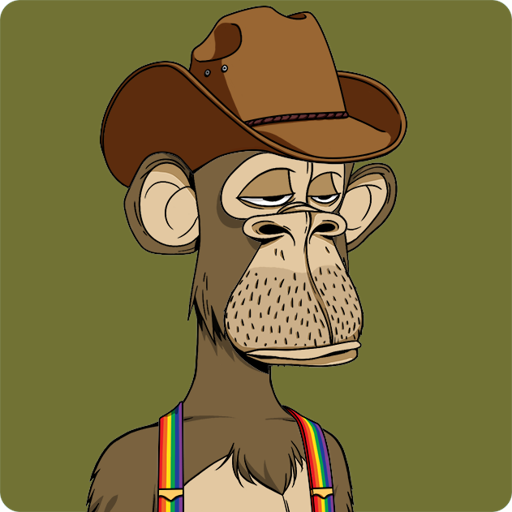

In [85]:
orig_img_data = base64.b64decode(bayc_result["orig_img_file"])
orig_img = Image.open(BytesIO(orig_img_data)).resize((512, 512))
orig_img.show()

## CryptoPunks 시험 이미지 테스트

### 시험 이미지 샘플 확인

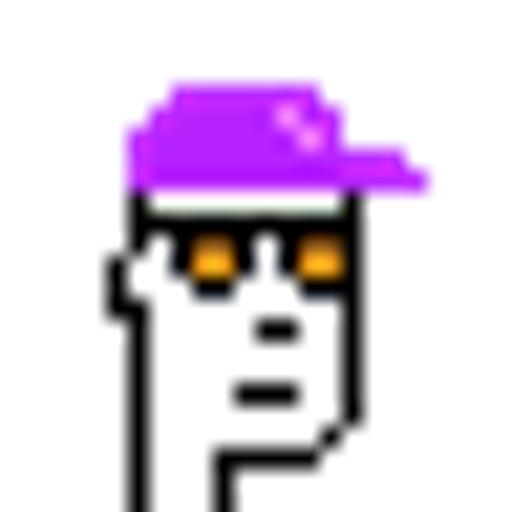

In [9]:
cryptopunks_plagiarism_sample_path = os.path.join(cryptopunks_plagiarism_path, random.choice(cryptopunks_plagiarism_test_file_list))
cryptopunks_plagiarism_sample_image = Image.open(cryptopunks_plagiarism_sample_path).resize((512, 512))
cryptopunks_plagiarism_sample_image.show()

### API 테스트 및 결과 확인 (표절 여부 등)

In [32]:
cryptopunks_result = test_check_and_register(cryptopunks_plagiarism_sample_path)

{'plagiarism': True, 'orig_img_cid': 'QmX9o6m2paxVLVBa7gPQidUAMFFSmhofDL3pYmdWugy9p8', 'orig_img_file': 'iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAfklEQVR42mNgGAWDHjRKbv+PC9PM8E2Jdyi3BJ/LkS2hmQUUBxk5FpBqyf9XN28SxCB15IbSfxIweRbAXBhjyQ/GuMTINhxm2PFSETBGtgBZjCILkMIZqxjZFtAlkvEYSDsLaO4DmlqAHLHDI4goMZyBQLqn2HBcFlAVUMUCAEPe/HuKaMjdAAAAAElFTkSuQmCC', 'probability': 84.58291590213776, 'new_img_cid': None}


### 표절으로 의심되는 이미지 확인

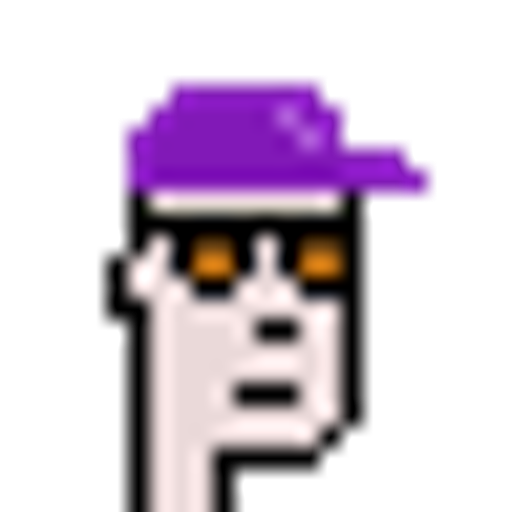

In [11]:
orig_img_data = base64.b64decode(cryptopunks_result["orig_img_file"])
orig_img = Image.open(BytesIO(orig_img_data)).resize((512, 512))
orig_img.show()

## 새로운 이미지 등록 테스트

In [86]:
new_image_path = "nft_images/test_images"
new_image_list = [f for f in os.listdir(new_image_path) if f.endswith('.png')]
print(new_image_list)

['trippytoadznft.png', 'theshiboshis.png', 'nftrex.png', 'hapeprime.png', 'dooggies.png', 'cyberkongz.png', 'cryptoskulls.png', 'alpacadabraz.png']


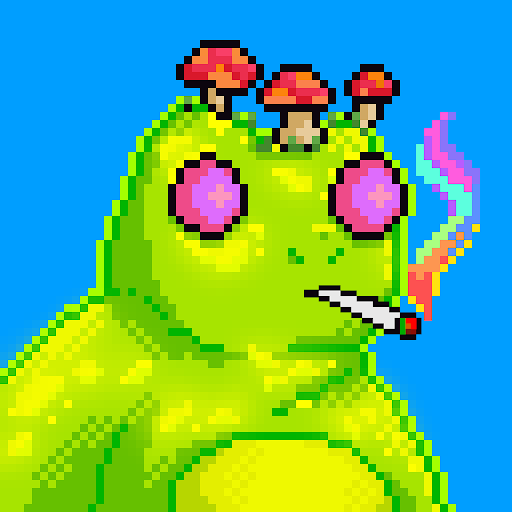

In [90]:
test_index = 0
test_img_path = os.path.join(new_image_path, new_image_list[test_index])
test_img = Image.open(test_img_path)
test_img.show()

In [91]:
test_result = test_check_and_register(test_img_path)

{'plagiarism': False, 'orig_img_cid': None, 'orig_img_file': None, 'probability': None, 'new_img_cid': 'QmTcv5t4cpTBuY3N4TeE2QpiniUPRBDu2Uj6Ck8dduf3t8'}


## 리셋 (Azuki, BAYC, CryptoPunks를 제외한 새로운 등록 이미지 삭제)

In [89]:
test_reset()

{'status': 'reset successful'}
